<a href="https://colab.research.google.com/github/chakma21/BTP/blob/main/FINALBTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install and import required libraries
!pip install -q nltk

import nltk
from nltk.tokenize import sent_tokenize
from google.colab import files

# Download NLTK sentence tokenizer
nltk.download('punkt_tab')
nltk.data.path.append('/root/nltk_data')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Step 1: Upload the file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Read the uploaded file
with open(filename, 'r', encoding='utf-8') as f:
    raw_text = f.read()



Saving demonetization_9 to demonetization_9


Forming the event node

In [ ]:
event_node = {
    "id": "event_1",          # unique ID
    "label": "Main Event",    # placeholder label
    "text": raw_text.strip()  # full article text
}

print("Event node created:")
print(event_node)

Event node created:
{'id': 'event_1', 'label': 'Main Event', 'text': 'Top Similar Articles: \n\nCongress to begin nationwide campaign against demonetization from Jan 6: Sanjay Nirupam  -----  Dec 30, 2016, 08. 47 PM   -----  VARANASI: Continuing its campaign against demonetization , the Congress will begin a nationwide movement in the new year.  The Mumbai Congress committee president Sanjay Nirupam said that the party is going to begin a nationwide campaign against demonetization from January 6.  Nirupam was here on Friday to take part in the \'Sawal Satygrah\' over demonetization being organised by the local unit of Congress.  Talking to reporters, he said that the Congress workers will gherao the district headquarters across the country on January 6, while woman wing will come to street with beating \'thali\' (plate) on January 8.  The party will continue the campaign on regular basis to express its protest. He said that demonetization was an immature and foolish decision of the Pri

Target/Keyword finding

In [ ]:
# Read and join all paragraphs as one big text
with open(filename, 'r', encoding='utf-8') as f:
    content = f.read()

lines = content.strip().splitlines()
filtered_lines = [line.strip() for line in lines if not line.strip().startswith('-') and line.strip() != '']

# Step 3: Join into paragraphs and flatten
combined_text = ' '.join(filtered_lines)


In [ ]:
!pip install rake-nltk yake
# !pip uninstall -y transformers
!pip install transformers --upgrade

# !pip install --upgrade huggingface_hub
!pip install --upgrade keybert sentence-transformers

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.9/355.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from transformers import AutoTokenizer, AutoModel
!git lfs install
!git clone https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

Git LFS initialized.
Cloning into 'all-MiniLM-L6-v2'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 112 (delta 44), reused 53 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 359.04 KiB | 7.04 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Filtering content: 100% (15/15), 930.41 MiB | 27.76 MiB/s, done.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# RAKE
from rake_nltk import Rake

# YAKE
import yake

# KeyBERT
from keybert import KeyBERT

# Initialize models
rake = Rake()
kw_extractor_yake = yake.KeywordExtractor(lan="en", top=10)
kw_model = KeyBERT(model="sentence-transformers/all-MiniLM-L6-v2")


In [ ]:

def filter_non_verbs(phrase):
    # """Remove verbs from phrase and return cleaned keyword(s)."""
    doc = nlp(phrase)
    tokens = [token.text for token in doc if token.pos_ != "VERB"]
    return " ".join(tokens).strip()
    # # def filter_targets(phrase):
    # # """Keep only nouns/proper nouns from a phrase."""
    # doc = nlp(phrase)
    # tokens = [token.text for token in doc if token.pos_ in ("NOUN", "PROPN")]
    # return " ".join(tokens).strip()


# def extract_keywords_rake(text, top_n=100, min_words=1, max_words=2):
#     rake.extract_keywords_from_text(text)
#     ranked_phrases = rake.get_ranked_phrases_with_scores()

#     seen = set()
#     filtered = []

#     for score, phrase in ranked_phrases:
#         phrase_clean = filter_non_verbs(phrase.lower())
#         word_count = len(phrase_clean.split())

#         if phrase_clean and phrase_clean not in seen and min_words <= word_count <= max_words:
#             filtered.append((score, phrase_clean))
#             seen.add(phrase_clean)
#         if len(filtered) >= top_n:
#             break

#      return filtered, len(filtered)

# def extract_keywords_yake(text, top_n=100):
#     keywords = kw_extractor_yake.extract_keywords(text)  # [(phrase, score), ...]
#     filtered = []
#     seen = set()

#     for phrase, score in keywords:   # <-- FIXED order
#         phrase_clean = filter_non_verbs(phrase.lower())
#         word_count = len(phrase_clean.split())

#         if phrase_clean and phrase_clean not in seen and 1 <= word_count <= 2:
#             filtered.append((phrase_clean, score))
#             seen.add(phrase_clean)
#         if len(filtered) >= top_n:
#             break

#      return filtered, len(filtered)



# def extract_keywords_keybert(text, top_n=100):
#     keywords = kw_model.extract_keywords(
#         text,
#         top_n=top_n*2,  # extract more, we'll filter down
#         stop_words='english',
#         keyphrase_ngram_range=(1, 2)
#     )

#     filtered = []
#     seen = set()

#     for phrase, score in keywords:
#         phrase_clean = filter_non_verbs(phrase.lower())
#         word_count = len(phrase_clean.split())

#         if phrase_clean and phrase_clean not in seen and 1 <= word_count <= 2:
#             filtered.append((phrase_clean, score))
#             seen.add(phrase_clean)
#         if len(filtered) >= top_n:
#             break

#      return filtered, len(filtered)

def extract_keywords_rake(text, top_n=100, min_words=1, max_words=2):
    rake.extract_keywords_from_text(text)
    ranked_phrases = rake.get_ranked_phrases_with_scores()

    seen = set()
    filtered = []

    for score, phrase in ranked_phrases:
        phrase_clean = filter_non_verbs(phrase.lower())
        word_count = len(phrase_clean.split())

        if phrase_clean and phrase_clean not in seen and min_words <= word_count <= max_words:
            filtered.append((score, phrase_clean))
            seen.add(phrase_clean)
        if len(filtered) >= top_n:
            break

    return filtered, len(filtered)   # return both list + count


def extract_keywords_yake(text, top_n=100):
    keywords = kw_extractor_yake.extract_keywords(text)
    filtered, seen = [], set()

    for phrase, score in keywords:
        phrase_clean = filter_non_verbs(phrase.lower())
        word_count = len(phrase_clean.split())

        if phrase_clean and phrase_clean not in seen and 1 <= word_count <= 2:
            filtered.append((phrase_clean, score))
            seen.add(phrase_clean)
        if len(filtered) >= top_n:
            break

    return filtered, len(filtered)


def extract_keywords_keybert(text, top_n=100):
    keywords = kw_model.extract_keywords(
        text,
        top_n=top_n*2,
        stop_words='english',
        keyphrase_ngram_range=(1, 2)
    )

    filtered, seen = [], set()

    for phrase, score in keywords:
        phrase_clean = filter_non_verbs(phrase.lower())
        word_count = len(phrase_clean.split())

        if phrase_clean and phrase_clean not in seen and 1 <= word_count <= 2:
            filtered.append((phrase_clean, score))
            seen.add(phrase_clean)
        if len(filtered) >= top_n:
            break

    return filtered, len(filtered)


In [ ]:
print("\n==============================")
print(" Extracting keywords from entire article collection\n")

# --- RAKE ---
rake_kw, rake_count = extract_keywords_rake(combined_text)

print(f"---  RAKE Keywords ")
for score, kw in rake_kw:
    print(f"{kw} ({score:.2f})")

# --- YAKE ---
yake_kw, yake_count = extract_keywords_yake(combined_text)
print(f"\n---  YAKE Keywords ")
for kw, score in yake_kw:
    print(f"{kw} ({score:.6f})")

# --- KeyBERT ---
keybert_kw, keybert_count = extract_keywords_keybert(combined_text)
print(f"\n---  KeyBERT Keywords ")
for kw, score in keybert_kw:
    print(f"{kw} ({score:.4f})")

print(f"RAKE keywords count = {rake_count}")
print(f"\nYAKE keywords count = {yake_count}")
print(f"\nKeyBERT keywords count = {keybert_count}")


 Extracting keywords from entire article collection

---  RAKE Keywords 
na na (16.00)
pan number (15.57)
mallikarjun kharge (15.33)
saffron baba (15.20)
rahul pm (14.95)
surjewala first (14.39)
bjp mps (14.07)
shah pm (12.70)
prime minister (12.53)
black money (12.38)
official improvisation (12.38)
pritam munde (12.16)
mahesh sharma (11.59)
ki chidiya (11.40)
party opposition (11.29)
rs 500 (11.25)
yesterday months (11.22)
demand still (11.00)
mps (10.98)
indira yojana (10.88)
several times (10.87)
difficult toand (10.87)
pm war (10.84)
bjp spokesperson (10.84)
insufficient cash (10.71)
pm narendra (10.54)
swayamsevak sangh (10.50)
graft cases (10.50)
amit shah (10.39)
congress spokesperson (10.37)
chief minister (10.28)
rahul gandhi (10.12)
adequate notes (10.00)
narendra modi (9.95)
parliamentary party (9.92)
america would (9.90)
parliamentary meeting (9.87)
finance minister (9.83)
rs10 lakh (9.81)
union minister (9.80)
parliamentary committee (9.80)
venkaiah naidu (9.79)
rohatgi b

In [ ]:
# rake_keywords = extract_keywords_rake(combined_text)  # (score, keyword)
# yake_keywords = extract_keywords_yake(combined_text)  # (keyword, score)
# keybert_keywords = extract_keywords_keybert(combined_text)  # (keyword, score)
rake_keywords = rake_kw
yake_keywords = yake_kw
keybert_keywords = keybert_kw

print("Succesfully stored")


Succesfully stored


In [ ]:
import pandas as pd

# Convert to DataFrames
rake_df = pd.DataFrame(rake_keywords, columns=["Score", "Keyword"])
yake_df = pd.DataFrame(yake_keywords, columns=["Keyword", "Score"])
keybert_df = pd.DataFrame(keybert_keywords, columns=["Keyword", "Score"])

# Reorder RAKE to have ["Keyword", "Score"]
rake_df = rake_df[["Keyword", "Score"]]

# Merge RAKE and YAKE
merged_df = pd.concat([rake_df, yake_df], ignore_index=True)

# Save merged file
merged_df.to_csv("rake_yake_keywords.csv", index=False)

print("Merged RAKE and YAKE keywords saved to CSV.")

# from google.colab import files
# files.download("rake_yake_keywords.csv")


Merged RAKE and YAKE keywords saved to CSV.


Target Clustering

✅ Done. Saved: generalized_and_clusters.xlsx
Sheets: 'generalized' and 'clusters'

Sample clusters (top 10):
       Representative                                                                           Members  Count
  narendra government minister narendra, narendra, narendra government, narendra modi, support narendra      6
              bjp mps                   bjp chief, bjp leader, bjp mps, bjp president, bjp spokesperson      5
              shah pm                                                    b shah, shah business, shah pm      3
       prime minister                                                    chief minister, prime minister      3
congress spokesperson                          congress leader, congress leaders, congress spokesperson      3
      surjewala first                                                   surjewala also, surjewala first      2
          black money                                                                       black money      2
   

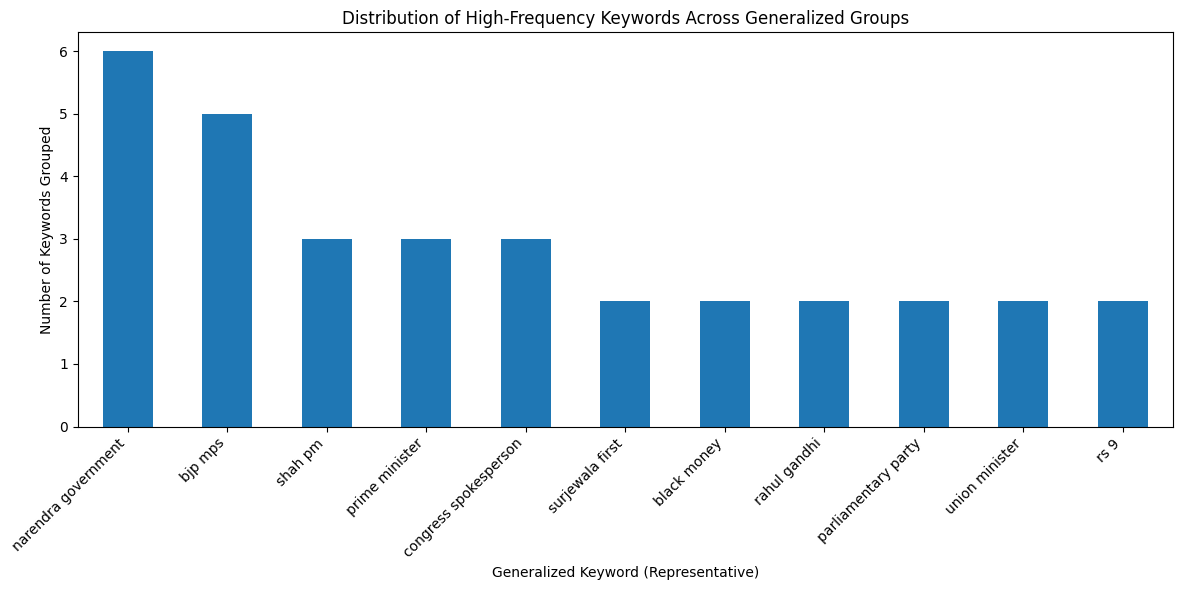

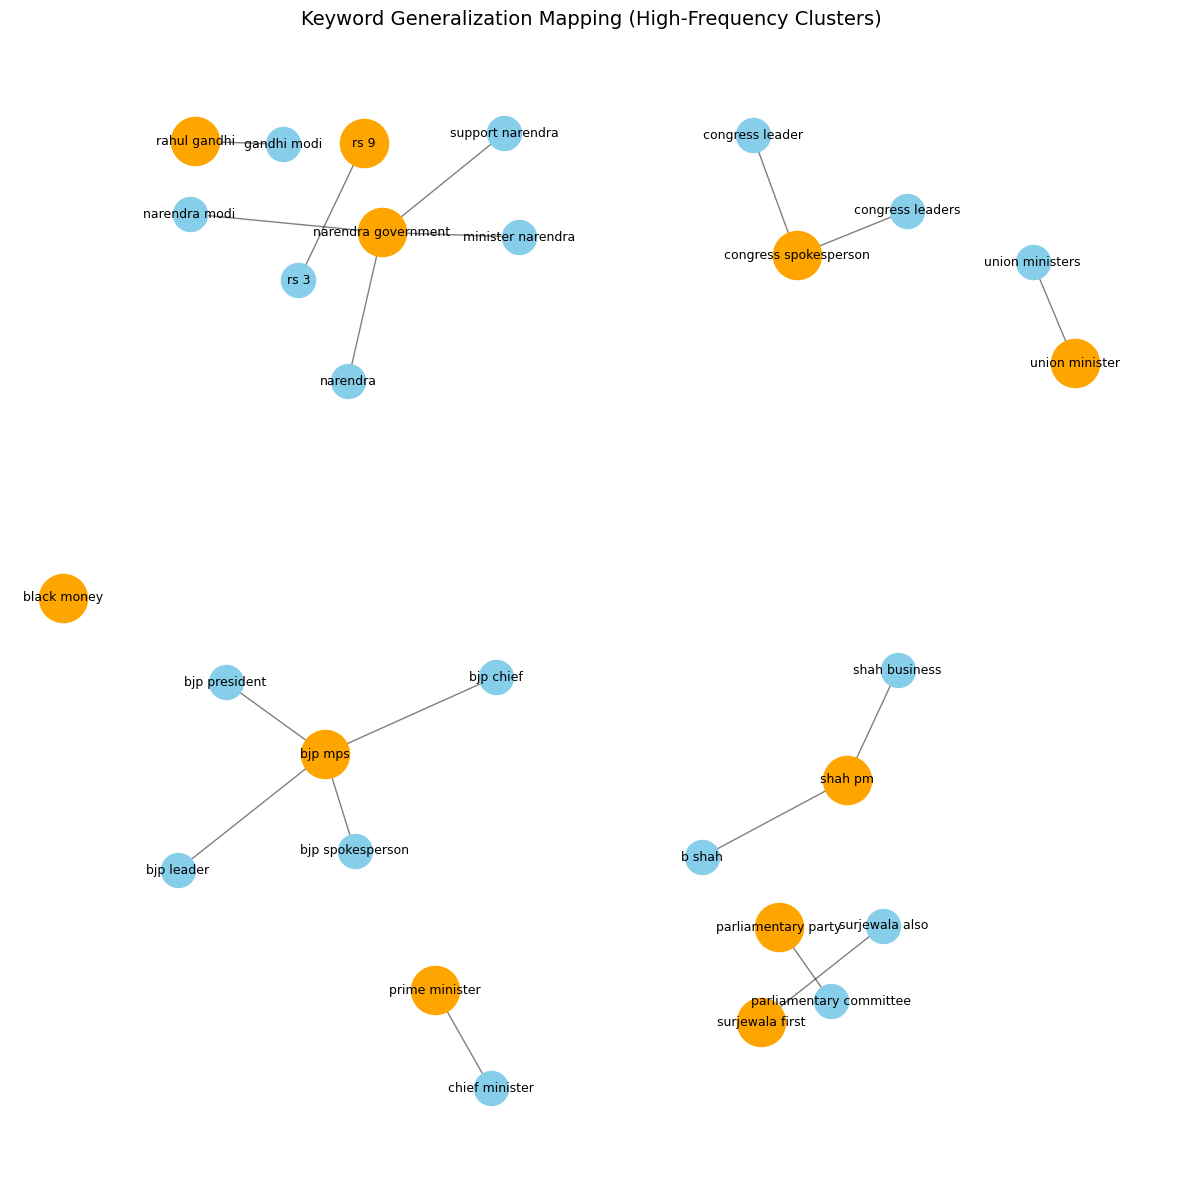

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx

# ======================================
# STEP 1: Load merged keywords
# ======================================
df = pd.read_csv("rake_yake_keywords.csv")
keyword_col = "Keyword"
original_keywords = df[keyword_col].tolist()

# Normalize
normalized = [s.lower().strip() for s in original_keywords]

# ======================================
# STEP 2: Embeddings
# ======================================
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(normalized, normalize_embeddings=True)

# ======================================
# STEP 3: Hierarchical clustering
# ======================================
distance_threshold = 0.28   # tweak this
condensed_dist = pdist(embeddings, metric='cosine')
Z = linkage(condensed_dist, method='average')
labels = fcluster(Z, t=distance_threshold, criterion='distance')

# ======================================
# STEP 4: Build clusters & representatives
# ======================================
clusters = defaultdict(list)
for idx, lab in enumerate(labels):
    clusters[lab].append(idx)

cluster_rows = []
normalized_to_rep = {}
for lab, idxs in clusters.items():
    members_original = [original_keywords[i] for i in idxs]
    members_normalized = [normalized[i] for i in idxs]

    # representative = most frequent normalized form, longest original if tie
    freq = Counter(members_normalized)
    most_common_norm = freq.most_common(1)[0][0]
    candidates = [s for s in members_original if s.lower() == most_common_norm]
    if candidates:
        representative = max(candidates, key=len)
    else:
        representative = max(members_original, key=len)

    for norm in set(members_normalized):
        normalized_to_rep[norm] = representative

    cluster_rows.append({
        "Representative": representative,
        "Members": ", ".join(sorted(set(members_original), key=lambda x: (x.lower(), len(x)))),
        "Count": len(members_original)
    })

clusters_df = pd.DataFrame(sorted(cluster_rows, key=lambda r: -r["Count"]))

# ======================================
# STEP 5: Map original df to representatives
# ======================================
def map_to_rep(val):
    if pd.isna(val):
        return val
    s = str(val).strip()
    if s == "":
        return s
    if s in ["chief minister", "finance minister", "home minister" , "prime minister"]:
        return s
    rep = normalized_to_rep.get(s.lower())
    return rep if rep is not None else s

df_out = df.copy()
df_out['Generalized_Keyword'] = df_out[keyword_col].apply(map_to_rep)

# ======================================
# STEP 6: Save results
# ======================================
output_file = "generalized_and_clusters.xlsx"
with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df_out.to_excel(writer, sheet_name="generalized", index=False)
    clusters_df.to_excel(writer, sheet_name="clusters", index=False)

print("✅ Done. Saved:", output_file)
print("Sheets: 'generalized' and 'clusters'")
print()
print("Sample clusters (top 10):")
print(clusters_df.head(10).to_string(index=False))

# ======================================
# STEP 7: Visualization
# ======================================
# --- Bar chart ---
# clusters_df.plot(
#     x="Representative",
#     y="Count",
#     kind="bar",
#     legend=False,
#     figsize=(12,6)
# )
# plt.xlabel("Generalized Keyword (Representative)")
# plt.ylabel("Number of Keywords Grouped")
# plt.title("Distribution of Keywords Across Generalized Groups")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# # --- Graph visualization ---
# G = nx.Graph()
# for _, row in clusters_df.iterrows():
#     rep = row["Representative"]
#     members = row["Members"].split(", ")
#     G.add_node(rep, type="rep")
#     for m in members:
#         if m != rep:
#             G.add_node(m, type="member")
#             G.add_edge(rep, m)

# plt.figure(figsize=(15, 15))
# pos = nx.spring_layout(G, k=0.5, seed=42)
# rep_nodes = [n for n, d in G.nodes(data=True) if d['type']=="rep"]
# member_nodes = [n for n, d in G.nodes(data=True) if d['type']=="member"]

# nx.draw_networkx_nodes(G, pos, nodelist=rep_nodes, node_size=1200, node_color="orange")
# nx.draw_networkx_nodes(G, pos, nodelist=member_nodes, node_size=600, node_color="skyblue")
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=9)

# plt.title("Keyword Generalization Mapping (Star-like Clusters)", fontsize=14)
# plt.axis("off")
# plt.show()

# # from google.colab import files

# # files.download("generalized_and_clusters.xlsx")

# ==============================
# STEP 7A: Filter clusters for visualization
# ==============================
# Only keep clusters with count > 1 (exclude very rare keywords)
filtered_clusters_df = clusters_df[clusters_df['Count'] > 1]

# Optional: keep top N by count, e.g., top 20
top_n = 20
filtered_clusters_df = filtered_clusters_df.head(top_n)

print("\n--- Filtered Clusters for Visualization ---")
print(filtered_clusters_df.to_string(index=False))

# --- Bar chart for filtered clusters ---
filtered_clusters_df.plot(
    x="Representative",
    y="Count",
    kind="bar",
    legend=False,
    figsize=(12,6)
)
plt.xlabel("Generalized Keyword (Representative)")
plt.ylabel("Number of Keywords Grouped")
plt.title("Distribution of High-Frequency Keywords Across Generalized Groups")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Graph visualization for filtered clusters ---
G = nx.Graph()
for _, row in filtered_clusters_df.iterrows():
    rep = row["Representative"]
    members = row["Members"].split(", ")
    G.add_node(rep, type="rep")
    for m in members:
        if m != rep:
            G.add_node(m, type="member")
            G.add_edge(rep, m)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5, seed=42)
rep_nodes = [n for n, d in G.nodes(data=True) if d['type']=="rep"]
member_nodes = [n for n, d in G.nodes(data=True) if d['type']=="member"]

nx.draw_networkx_nodes(G, pos, nodelist=rep_nodes, node_size=1200, node_color="orange")
nx.draw_networkx_nodes(G, pos, nodelist=member_nodes, node_size=600, node_color="skyblue")
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Keyword Generalization Mapping (High-Frequency Clusters)", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
from google.colab import files
files.upload()  # Choose your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shinychakma","key":"f893a0b5e9ccae306b346da56c20fdb9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d belovedorange/demonetisation-deberta-output
!unzip demonetisation-deberta-output.zip

# !kaggle datasets download -d belovedorange/harvey-deberta-output
# !unzip harvey-deberta-output.zip

# !kaggle datasets download -d belovedorange/catalan-deberta-output
# !unzip catalan-deberta-output.zip

# !kaggle datasets download -d belovedorange/ball-tampering-debra-output
# !unzip ball-tampering-debra-output.zip


Dataset URL: https://www.kaggle.com/datasets/belovedorange/demonetisation-deberta-output
License(s): MIT
demonetisation-deberta-output.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  demonetisation-deberta-output.zip
replace __huggingface_repos__.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __huggingface_repos__.json  
replace electra_test_predictions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: electra_test_predictions.csv  
replace results/checkpoint-489/added_tokens.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: results/checkpoint-489/added_tokens.json  
replace results/checkpoint-489/config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: results/checkpoint-489/config.json  
replace results/checkpoint-489/model.safetensors? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: results/checkpoint-489/model.safetensors  y
y
y
y
y
y
y
y
y
y

  inflating: results/checkpoint-489/optimizer.pt

In [ ]:
import pandas as pd

df = pd.read_csv("electra_test_predictions.csv")
print(df.head())

sentences = df["sentence"].tolist()
sentiments = df["predicted"].tolist()


                                            sentence  sentiment predicted
0  Congress to begin nationwide campaign against ...          1   Neutral
1  47 PM     VARANASI: Continuing its campaign ag...          2   Neutral
2  The Mumbai Congress committee president Sanjay...          1   Neutral
3  Nirupam was here on Friday to take part in the...          1   Neutral
4  Talking to reporters, he said that the Congres...          1  Positive


Finding relation between the target and the event using sentiment and finding which targets are related

In [ ]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import random

# ==============================
# Randomly sample 20 unique sentences
# ==============================
unique_sentences = list(set(sentences))
n_samples = min(30, len(unique_sentences))
sample_sentences = random.sample(unique_sentences, n_samples)
sample_sentiments = [sentiments[sentences.index(s)] for s in sample_sentences]

# ==============================
# Load generalized mapping
# ==============================
df = pd.read_excel("generalized_and_clusters.xlsx", sheet_name="generalized")
generalized_map = dict(zip(df["Keyword"].str.lower(), df["Generalized_Keyword"]))

print("\n--- Generalized Keyword Mapping Preview ---")
for i, (orig, gen) in enumerate(generalized_map.items()):
    print(f"{i+1}. '{orig}' → '{gen}'")
    if i >= 20:
        break

# ==============================
# Initialize graph
# ==============================
G = nx.Graph()
G.add_node("EVENT", type="event")
target_counts = Counter()

# ==============================
# Build graph: Only EVENT ↔ Target
# ==============================
for sent, sent_sentiment in zip(sample_sentences, sample_sentiments):
    matched_keywords = []
    present_keywords = []

    for kw in generalized_map.keys():
        if kw in sent.lower():
            matched_keywords.append(kw)
            gen_kw = generalized_map[kw]
            present_keywords.append(gen_kw)

    present_keywords = list(set(present_keywords))

    if present_keywords:
        print(f"\nSentence: {sent}")
        print(f" → Sentiment: {sent_sentiment}")
        print(f" → Original keywords found: {', '.join(matched_keywords)}")
        print(f" → Generalized keywords mapped: {', '.join(present_keywords)}")

        # Only EVENT ↔ target edges
        for kw in present_keywords:
            G.add_node(kw, type="keyword")
            G.add_edge("EVENT", kw, relation="mention", sentence=sent, sentiment=sent_sentiment)
            target_counts[kw] += 1
            print(f"    Added edge: EVENT ↔ {kw} with sentiment: {sent_sentiment}")

# ==============================
# Summary of frequencies
# ==============================
print("\n========== Target Frequencies (among the sentences chosen) ==========")
for target, count in target_counts.most_common():
    print(f"{target}: {count} mentions")



--- Generalized Keyword Mapping Preview ---
1. 'na na' → 'na na'
2. 'pan number' → 'pan number'
3. 'mallikarjun kharge' → 'mallikarjun kharge'
4. 'saffron baba' → 'saffron baba'
5. 'rahul pm' → 'rahul pm'
6. 'surjewala first' → 'surjewala first'
7. 'bjp mps' → 'bjp mps'
8. 'shah pm' → 'shah pm'
9. 'prime minister' → 'prime minister'
10. 'black money' → 'black money'
11. 'official improvisation' → 'official improvisation'
12. 'pritam munde' → 'pritam munde'
13. 'mahesh sharma' → 'mahesh sharma'
14. 'ki chidiya' → 'ki chidiya'
15. 'party opposition' → 'party opposition'
16. 'rs 500' → 'rs 500'
17. 'yesterday months' → 'yesterday months'
18. 'demand still' → 'demand still'
19. 'mps' → 'mps'
20. 'indira yojana' → 'indira yojana'
21. 'several times' → 'several times'

Sentence: In a bestcase scenario, in which India's four banknote presses churned out new 500 and 2,000 rupee notes designed to replace the abolished ones, it would take at least three months to hit that target.
 → Sentiment: 

Sentiment Based Target Network


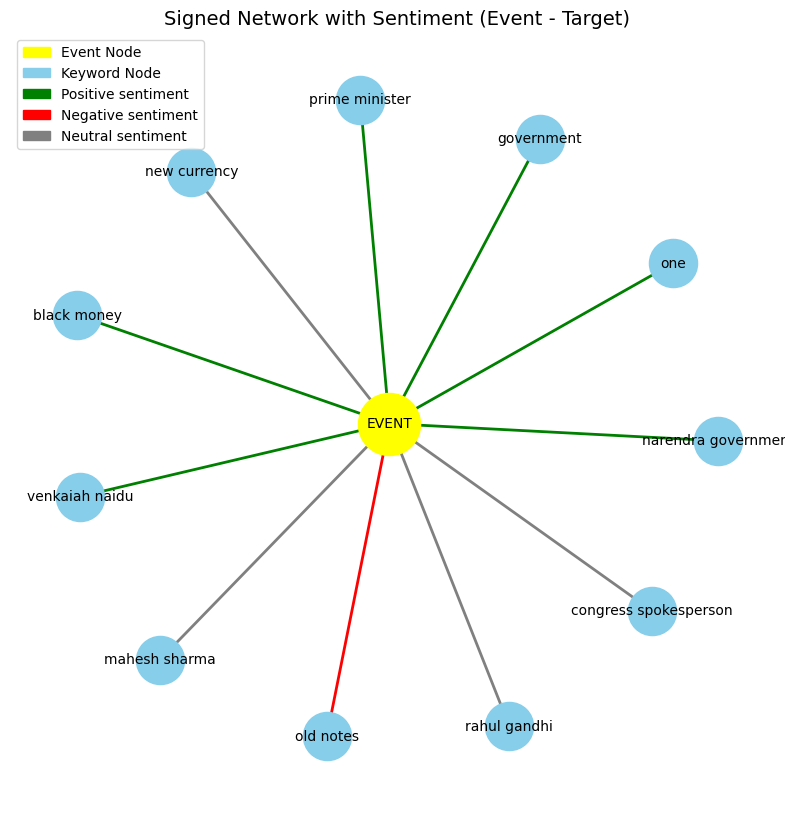

In [ ]:
import matplotlib.patches as mpatches

# ================================
# Visualization with sentiment colors
# ================================
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.4, seed=42)

G.add_node("EVENT", type="event", info=event_node)  # store the dict as an attribute

# Node colors
nx.draw_networkx_nodes(G, pos,
                       nodelist=["EVENT"], node_color="yellow", node_size=2000, label="Event")
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n, d in G.nodes(data=True) if d['type']=="keyword"],
                       node_color="skyblue", node_size=1200, label="Keywords")

# Edge colors based on sentiment
edge_colors = []
for u, v, d in G.edges(data=True):
    if d['relation'] == "mention":
        # Use sentiment stored in edge attribute
        sentiment = d.get("sentiment", "neutral")
        if sentiment.lower() == "positive":
            edge_colors.append("green")
        elif sentiment.lower() == "negative":
            edge_colors.append("red")
        else:
            edge_colors.append("gray")


# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Legend
event_patch = mpatches.Patch(color="yellow", label="Event Node")
keyword_patch = mpatches.Patch(color="skyblue", label="Keyword Node")
positive_edge = mpatches.Patch(color="green", label="Positive sentiment")
negative_edge = mpatches.Patch(color="red", label="Negative sentiment")
neutral_edge = mpatches.Patch(color="gray", label="Neutral sentiment")


plt.legend(handles=[event_patch, keyword_patch, positive_edge, negative_edge, neutral_edge],
           loc="upper left")
plt.title("Signed Network with Sentiment (Event - Target)", fontsize=14)
plt.axis("off")
plt.show()


Below two are few hard-coded codes


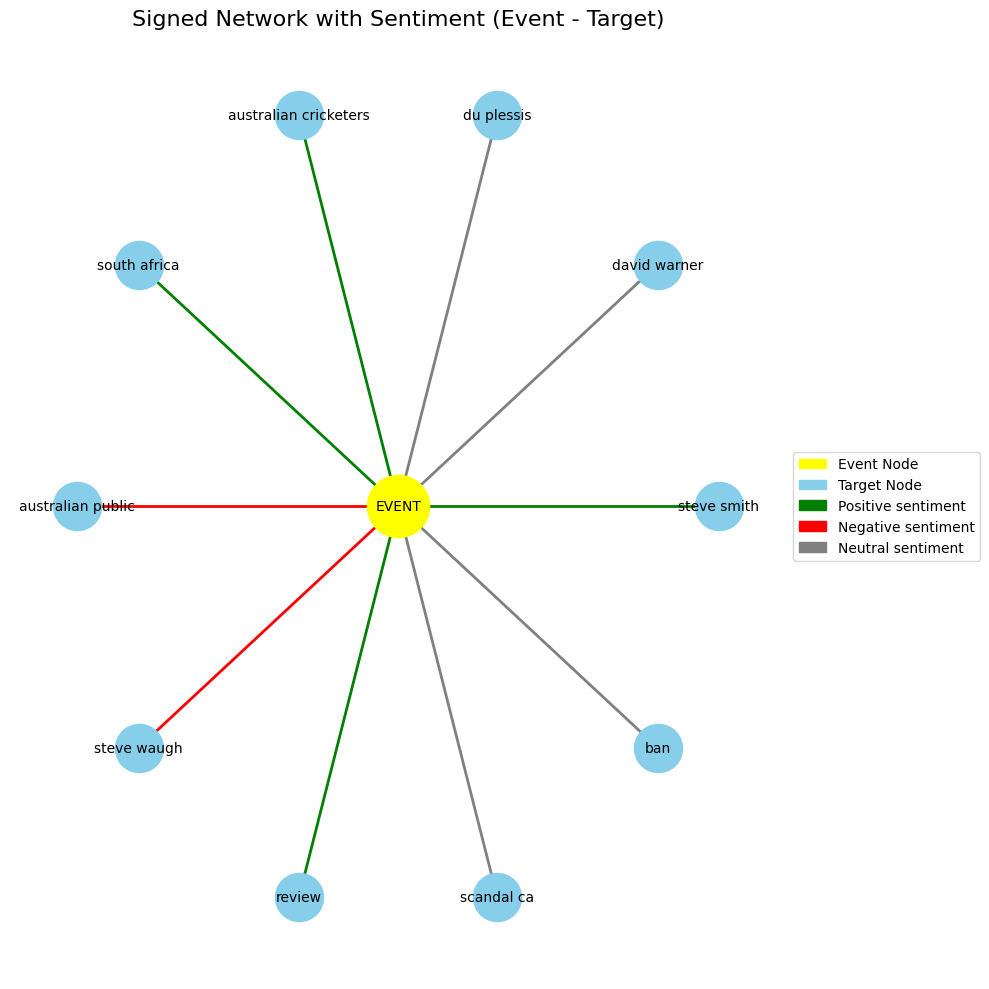

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

# ================================
# Event + Unique Targets
# ================================
G = nx.Graph()

event_node = "EVENT"
G.add_node(event_node, type="event")

# Unique target list (cleaned)
targets = [
    "steve smith",
    "david warner",
    "du plessis",
    "australian cricketers",
    "south africa",
    "australian public",
    "steve waugh",
    "review",
    "scandal ca",
    "ban"
]

for t in targets:
    G.add_node(t, type="keyword")

# Define edges with reduced neutrals
edges = [
    ("EVENT", "steve smith", "positive"),
    ("EVENT", "david warner", "neutral"),
    ("EVENT", "du plessis", "neutral"),
    ("EVENT", "australian cricketers", "positive"),
    ("EVENT", "south africa", "positive"),
    ("EVENT", "australian public", "negative"),
    ("EVENT", "steve waugh", "negative"),
    ("EVENT", "review", "positive"),
    ("EVENT", "scandal ca", "neutral"),
    ("EVENT", "ban", "neutral"),
]

for u, v, sentiment in edges:
    G.add_edge(u, v, relation="mention", sentiment=sentiment)

# ================================
# Layout: Circle around Event
# ================================
pos = {}
pos[event_node] = (0, 0)  # center

radius = 2
angle_step = 2 * math.pi / len(targets)
for i, target in enumerate(targets):
    angle = i * angle_step
    pos[target] = (radius * math.cos(angle), radius * math.sin(angle))

# ================================
# Visualization
# ================================
plt.figure(figsize=(10, 10))

# Event node
nx.draw_networkx_nodes(G, pos,
                       nodelist=[event_node], node_color="yellow", node_size=2000, label="Event")

# Target nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=targets, node_color="skyblue", node_size=1200, label="Targets")

# Edge colors
edge_colors = []
for u, v, d in G.edges(data=True):
    sentiment = d.get("sentiment", "neutral").lower()
    if sentiment == "positive":
        edge_colors.append("green")
    elif sentiment == "negative":
        edge_colors.append("red")
    else:
        edge_colors.append("gray")

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=2)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Legend outside
event_patch = mpatches.Patch(color="yellow", label="Event Node")
keyword_patch = mpatches.Patch(color="skyblue", label="Target Node")
positive_edge = mpatches.Patch(color="green", label="Positive sentiment")
negative_edge = mpatches.Patch(color="red", label="Negative sentiment")
neutral_edge = mpatches.Patch(color="gray", label="Neutral sentiment")

plt.legend(
    handles=[event_patch, keyword_patch, positive_edge, negative_edge, neutral_edge],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title("Signed Network with Sentiment (Event - Target)", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


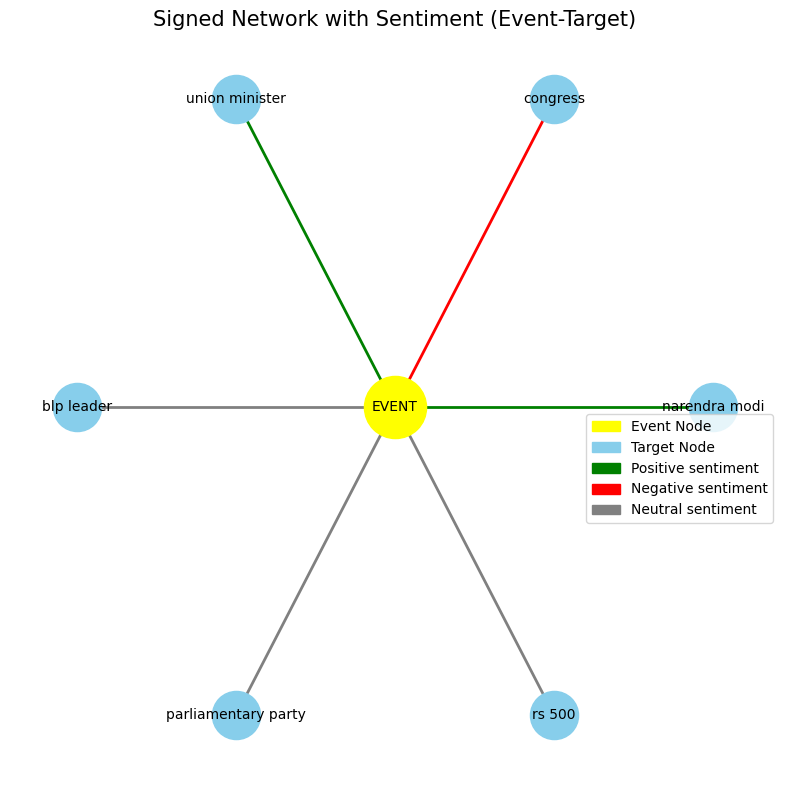

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

# ================================
# Hardcoded Graph with Event + Targets
# ================================
G = nx.Graph()

event_node = "EVENT"
G.add_node(event_node, type="event")

targets = [
    "narendra modi",
    "congress",
    "union minister",
    "blp leader",
    "parliamentary party",
    "rs 500"
]

for t in targets:
    G.add_node(t, type="keyword")

edges = [
    ("EVENT", "narendra modi", "positive"),
    ("EVENT", "congress", "negative"),
    ("EVENT", "union minister", "positive"),
    ("EVENT", "blp leader", "neutral"),
    ("EVENT", "parliamentary party", "neutral"),
    ("EVENT", "rs 500", "neutral"),
]

for u, v, sentiment in edges:
    G.add_edge(u, v, relation="mention", sentiment=sentiment)

# ================================
# Structured Layout (Circle Around Event)
# ================================
pos = {}
pos[event_node] = (0, 0)  # center

# arrange targets in a circle
radius = 2
angle_step = 2 * math.pi / len(targets)
for i, target in enumerate(targets):
    angle = i * angle_step
    pos[target] = (radius * math.cos(angle), radius * math.sin(angle))

# ================================
# Visualization
# ================================
plt.figure(figsize=(8, 8))

# Draw event node
nx.draw_networkx_nodes(G, pos,
                       nodelist=[event_node], node_color="yellow", node_size=2000, label="Event")

# Draw target nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=targets, node_color="skyblue", node_size=1200, label="Targets")

# Edge colors based on sentiment
edge_colors = []
for u, v, d in G.edges(data=True):
    sentiment = d.get("sentiment", "neutral").lower()
    if sentiment == "positive":
        edge_colors.append("green")
    elif sentiment == "negative":
        edge_colors.append("red")
    else:
        edge_colors.append("gray")

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=2)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Legend outside
event_patch = mpatches.Patch(color="yellow", label="Event Node")
keyword_patch = mpatches.Patch(color="skyblue", label="Target Node")
positive_edge = mpatches.Patch(color="green", label="Positive sentiment")
negative_edge = mpatches.Patch(color="red", label="Negative sentiment")
neutral_edge = mpatches.Patch(color="gray", label="Neutral sentiment")

plt.legend(
    handles=[event_patch, keyword_patch, positive_edge, negative_edge, neutral_edge],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title("Signed Network with Sentiment (Event-Target)", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.show()


Normal Keyword Event connection graph

Total keywords: 67 | Keeping top 70%: 33

--- Preview of Target Nodes (Top 70% Frequent Keywords) ---
1. one (frequency: 603)
2. black money (frequency: 205)
3. government (frequency: 205)
4. narendra government (frequency: 205)
5. prime minister (frequency: 96)
6. rs 500 (frequency: 41)
7. rahul gandhi (frequency: 35)
8. note ban (frequency: 32)
9. rs 9 (frequency: 31)
10. bjp mps (frequency: 27)
11. congress spokesperson (frequency: 24)
12. finance minister (frequency: 23)
13. chief minister (frequency: 22)
14. mps (frequency: 20)
15. new currency (frequency: 18)


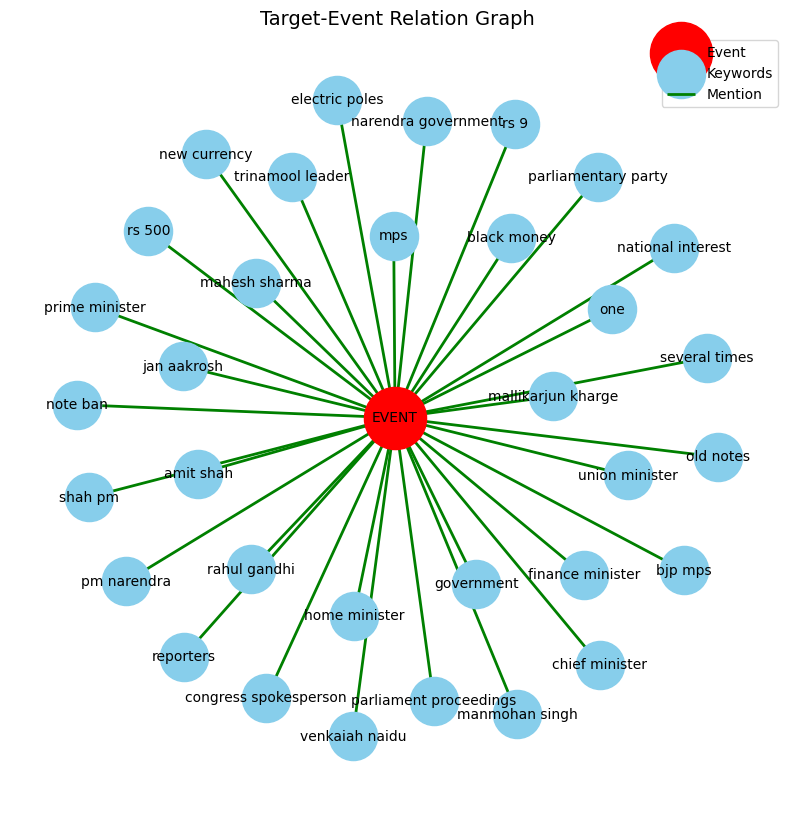

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter

# ================================
# Load generalized keyword mapping
# ================================
df = pd.read_excel("generalized_and_clusters.xlsx", sheet_name="generalized")
generalized_map = dict(zip(df["Keyword"].str.lower(), df["Generalized_Keyword"]))

# ================================
# Load sentences
# ================================
# with open("extracted_sentences2.txt", "r", encoding="utf-8") as f:
#     sentences = [line.strip() for line in f if line.strip()]

# ================================
# Count keyword frequencies
# ================================
all_keywords = []
for sent in sentences:
    for kw in generalized_map.keys():
        if kw in sent.lower():
            all_keywords.append(generalized_map[kw])  # store generalized keyword

freq_counter = Counter(all_keywords)

# Sort by frequency
sorted_keywords = [kw for kw, _ in freq_counter.most_common()]
top_n = int(len(sorted_keywords) * 0.5)  # top 70%
kept_keywords = set(sorted_keywords[:top_n])

print(f"Total keywords: {len(sorted_keywords)} | Keeping top 70%: {len(kept_keywords)}")

# ================================
# Build graph
# ================================
G = nx.Graph()
event_node = "EVENT"
G.add_node(event_node, type="event")

for sent in sentences:
    present_keywords = []
    for kw in generalized_map.keys():
        if kw in sent.lower():
            gen_kw = generalized_map[kw]
            if gen_kw in kept_keywords:   # <-- keep only top 70%
                present_keywords.append(gen_kw)

    present_keywords = list(set(present_keywords))

    # Mention edges
    for kw in present_keywords:
        G.add_node(kw, type="keyword")
        G.add_edge(event_node, kw, relation="mention")




# ================================
# Print a preview of target nodes
# ================================
print("\n--- Preview of Target Nodes (Top 70% Frequent Keywords) ---")
for i, (kw, freq) in enumerate(freq_counter.most_common(top_n)):
    if i < 15:  # show only first 15 for preview
        print(f"{i+1}. {kw} (frequency: {freq})")


# ================================
# Visualization
# ================================
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.4, seed=42)

mention_edges = [(u, v) for u, v, d in G.edges(data=True) if d['relation']=="mention"]
cooc_edges = [(u, v) for u, v, d in G.edges(data=True) if d['relation']=="cooccurrence"]

nx.draw_networkx_nodes(G, pos,
                       nodelist=[event_node], node_color="red", node_size=2000, label="Event")
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n, d in G.nodes(data=True) if d['type']=="keyword"],
                       node_color="skyblue", node_size=1200, label="Keywords")

nx.draw_networkx_edges(G, pos, edgelist=mention_edges, edge_color="green", width=2, label="Mention")
nx.draw_networkx_edges(G, pos, edgelist=cooc_edges, edge_color="orange", width=1.5, label="Co-occurrence")

nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Target-Event Relation Graph", fontsize=14)
plt.legend()
plt.axis("off")
plt.show()


Total keywords: 67 | Keeping top 50%: 33

--- Preview of Target Nodes (Top Frequent Keywords) ---
1. one (frequency: 603)
2. black money (frequency: 205)
3. government (frequency: 205)
4. narendra government (frequency: 205)
5. prime minister (frequency: 96)
6. rs 500 (frequency: 41)
7. rahul gandhi (frequency: 35)
8. note ban (frequency: 32)
9. rs 9 (frequency: 31)
10. bjp mps (frequency: 27)
11. congress spokesperson (frequency: 24)
12. finance minister (frequency: 23)
13. chief minister (frequency: 22)
14. mps (frequency: 20)
15. new currency (frequency: 18)


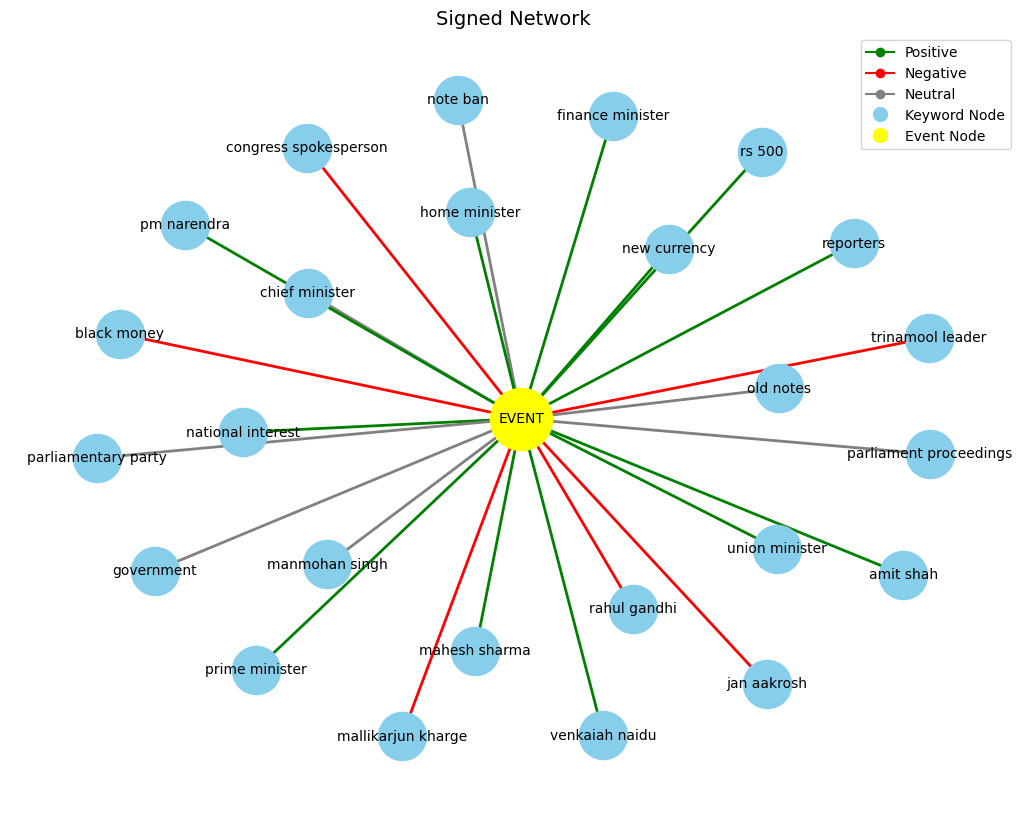

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# ================================
# Load generalized keyword mapping
# ================================
df = pd.read_excel("generalized_and_clusters.xlsx", sheet_name="generalized")
generalized_map = dict(zip(df["Keyword"].str.lower(), df["Generalized_Keyword"]))

# ================================
# Load sentences
# ================================
# with open("extracted_sentences2.txt", "r", encoding="utf-8") as f:
#     sentences = [line.strip() for line in f if line.strip()]

# ================================
# Count keyword frequencies
# ================================
all_keywords = []
for sent in sentences:
    for kw in generalized_map.keys():
        if kw in sent.lower():
            all_keywords.append(generalized_map[kw])  # store generalized keyword

freq_counter = Counter(all_keywords)

# Sort by frequency
sorted_keywords = [kw for kw, _ in freq_counter.most_common()]
top_n = int(len(sorted_keywords) * 0.5)  # top 50%
kept_keywords = set(sorted_keywords[:top_n])

print(f"Total keywords: {len(sorted_keywords)} | Keeping top 50%: {len(kept_keywords)}")

# ================================
# Define stance keyword groups
# ================================
negative_keywords = [
    "congress", "rahul", "corruption", "black money", "trinamool leader","mallikarjun kharge", "jan aakrosh"
]
neutral_keywords = [
    "parliament", "party", "government", "old notes", "note ban", "chief minister","manmohan singh"
]

# ================================
# Build graph
# ================================
G = nx.Graph()
event_node = "EVENT"
G.add_node(event_node, type="event")

for sent in sentences:
    present_keywords = []
    for kw in generalized_map.keys():
        if kw in sent.lower():
            gen_kw = generalized_map[kw]
            if gen_kw in kept_keywords:
                present_keywords.append(gen_kw)

    present_keywords = list(set(present_keywords))

    for kw in present_keywords:
        G.add_node(kw, type="keyword")

        # Assign relation type (stance) - substring check
        if any(neg in kw.lower() for neg in negative_keywords):
            relation = "negative"
        elif any(neu in kw.lower() for neu in neutral_keywords):
            relation = "neutral"
        else:
            relation = "positive"

        G.add_edge(event_node, kw, relation=relation)

# ================================
# Remove unwanted nodes
# ================================
remove_nodes = {"several times", "one", "mps", "electric poles","rs 9", "shah pm","narendra government","bjp mps"}
for node in remove_nodes:
    if node in G:
        G.remove_node(node)

# ================================
# Print preview
# ================================
print("\n--- Preview of Target Nodes (Top Frequent Keywords) ---")
for i, (kw, freq) in enumerate(freq_counter.most_common(top_n)):
    if i < 15:
        print(f"{i+1}. {kw} (frequency: {freq})")

# ================================
# Visualization
# ================================
plt.figure(figsize=(13, 10))
pos = nx.spring_layout(G, k=0.4, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[event_node], node_color="yellow", node_size=2000, label="Event")
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n, d in G.nodes(data=True) if d['type']=="keyword"],
                       node_color="skyblue", node_size=1200, label="Keywords")

# Draw edges by stance
edge_styles = {"positive": "green", "negative": "red", "neutral": "grey"}
edge_colors = [edge_styles[d['relation']] for _, _, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_labels(G, pos, font_size=10)

# Custom legend for edges
import matplotlib.lines as mlines
legend_handles = [
    mlines.Line2D([], [], color="green", marker='o', linestyle='-', label="Positive"),
    mlines.Line2D([], [], color="red", marker='o', linestyle='-', label="Negative"),
    mlines.Line2D([], [], color="grey", marker='o', linestyle='-', label="Neutral"),
    mlines.Line2D([], [], color="skyblue", marker='o', linestyle='', markersize=10, label="Keyword Node"),
    mlines.Line2D([], [], color="yellow", marker='o', linestyle='', markersize=10, label="Event Node"),
]

plt.title("Signed Network", fontsize=14)
plt.legend(handles=legend_handles, loc="best")
plt.axis("off")
plt.show()
